In [217]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from scipy.sparse import hstack, coo_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [218]:
df_by_post = pd.read_csv('../data/posts.csv')

In [219]:
# Redoing this here because of problems with pickle when switching from pc to mac
labels = {
    #Quarantined subreddits
    'TheRedPill' : -1,

    #apolitical (I think)
    'BlackPeopleTwitter' : 1,
    'WhitePeopleTwitter' : 1,
    'politics' : 0,
    'law' : 0,
    'news' : 0,
    'worldnews' : 0,
    'Jokes' : 0,
    'funny' : 0,
    'gaming' : 0,
    'Games' : 0,
    'technology' : 0,
    'tech' : 0,
    'technews' : 0,
    'gadgets' : 0,
    'space' : 0,
    'science' : 0,
    'nextfuckinglevel' : 0,
    'MurderedByWords' : 0,
    'mildlyinteresting' : 0,
    'Damnthatsinteresting' : 0,
    'mildlyinfuriating' : 0,
    'wallstreetbets' : 0,
    'Superstonk' : 0,
    'shitposting' : 0,
    'pcmasterrace' : 0,
    'teenagers' : 0,
    'PublicFreakout' : 0,
    'memes' : 0,
    'AskReddit' : 0,
    'AskAnAmerican' : 0,
    'Gamingcirclejerk' : 0,
    'nottheonion' : 0,
    'gatesopencomeonin' : 0,
    'wholesomememes' : 0,
    'wholesome' : 0,
    'interestingasfuck' : 0,
    'PoliticalCompassMemes' : 0,
    'PoliticalHumor' : 0,
    'AskMen' : 0,
    'AskWomen' : 0,
    'TooAfraidToAsk' : 0,
    'MadeMeSmile' : 0,
    'rareinsults' : 0,
    'UFOs' : 0,
    'HighStrangeness' : 0,
    'todayilearned' : 0,
    'RoastMe' : 0,
    'CryptoCurrency' : 0,
    'Wellthatsucks' : 0,
    'barstoolsports' : 0,
    'awfuleverything' : 0,
    'unpopularopinion' : 0,
    'atheism' : 0,
    'Christianity' : 0,
    'Catholicism' : 0,
    'changemyview' : 0,
    'Coronavirus' : 0,
    'COVID19' : 0,
    'coronavirusNYC' : 0,
    'Masks4All' : 1,
    'consipiratard' : 0,
    'environment' : 1,
    'environment2' : 1,
    'TrollXChromosomes' : 1,
    'TrollYChromosome' : 0,
    'WikiLeaks' : -1,
    '4chan' : 0,
    'greentext' : 0,
    'NoStupidQuestions' : 0,
    'offmychest' : 0,
    'texas' : 1,
    'TexasPolitics' : 1,
    'CanadaPolitics' : 0,
    'florida' : 0,
    'terriblefacebookmemes' : 0,
    'insanepeoplefacebook' : 0,
    'ShitMomGroupsSay' : 0,
    'masskillers' : 0,
    'Parenting' : 0,
    'Marriage' : 0,
    'neoliberal' : 1,
    'spacex' : 0,
    'savedyouaclick' : 0,
    'socialmedia' : 0,
    'moderatepolitics' : 0,
    'virginvschad' : -1,
    'CoronavirusCirclejerk' : -1,

    #left (I think)
    'democrats' : 1,
    'antiwork' : 1,
    'Anticonsumption' : 1,
    'SelfAwarewolves' : 1,
    'niceguys' : 1,
    'onejoke' : 1,
    'Feminism' : 1,
    'WitchesVsPatriarchy' : 1,
    'AreTheStraightsOK' : 1,
    'ToiletPaperUSA' : 1,
    'LeopardsAteMyFace' : 1,
    'TwoXChromosomes' : 1,
    'Anarchism' : 1,
    'TopMindsOfReddit' : 1,
    'esist' : 1,
    'MarchAgainstNazis' : 1,
    'exredpill' : 1,
    'MensLib' : 1,
    'lgbt' : 1,
    'gay' : 1,
    'bisexual' : 1,
    'AgainstHateSubreddits' : 1,
    'traaaaaaannnnnnnnnns' : 1,
    'trans' : 1,
    'GenderCynical' : 1,
    'EnoughTrumpSpam' : 1,
    'ABoringDystopia' : 1,
    'boringdystopia' : 1,
    'pointlesslygendered' : 1,
    'Persecutionfetish' : 1,
    'TheRightCantMeme' : 1,
    'MurderedByAOC' : 1,
    'LateStageCapitalism' : 1,
    'TheBluePill' : 1,
    'justneckbeardthings' : 1,
    'NotHowGirlsWork' : 1,
    'CapitalismSux' : 1,
    'GreenAndPleasant' : 1,
    'religiousfruitcake' : 1,
    'FragileWhiteRedditor' : 1,
    'Trumpvirus' : 1,
    'socialism' : 1,
    'asktransgender' : 1,
    'SandersForPresident' : 1,
    'MtF' : 1,
    'ftm' : 1,
    'egg_irl' : 1,
    'NonBinary' : 1,
    'HermanCainAward' : 1,
    'lostgeneration' : 1,
    'stupidpol' : 1,
    'Qult_Headquarters' : 1,
    'IncelTear' : 1,
    'ParlerWatch' : 1,
    'ShitLiberalsSay' : 1,
    'Hasan_Piker' : 1,
    'DemocraticSocialism' : 1,

    #right (I think)
    'JoeRogan' : -1,
    'dankmemes' : -1,
    'Memes_Of_The_Dank' : -1,
    'okbuddyretard' : -1,
    'okmatewanker' : -1,
    'pussypassdenied' : -1,
    'antifeminists' : -1,
    'MensRights' : -1,
    'ProudMaleFeminists' : -1,
    'WhereAreTheFeminists' : -1,
    'FeminismUncensored' : -1,
    'SRSsucks' : -1,
    'Conservative' : -1,
    'JordanPeterson' : -1,
    'conspiracy' : -1,
    'conspiracy_commons' : -1,
    'tucker_carlson' : -1,
    'TheTrumpZone' : -1,
    'LouderWithCrowder' : -1,
    'Libertarian' : -1,
    'AskThe_Donald' : -1,
    'walkaway' : -1,
    'ConservativesOnly' : -1,
    'IncelsCircleJerk' : -1,
    'BlackPillScience' : -1,
    'Blubber_Whaling' : -1,
    'memegender' : -1,
    'SocialJusticeInAction' : -1,
    'FreeSpeech' : -1,
    'libsofreddit' : -1,
    'EnoughCommieSpam' : -1,
    'TheLeftCantMeme' : -1,
    'Anarcho_Capitalism' : -1,
    'ar15' : -1,
    'guns' : -1,
    'canadaguns' : -1,
    'progun' : -1,
    'gunpolitics' : -1,
    'Firearms' : -1,
    'CCW' : -1,
    'Glocks': -1,
    'tacticalgear' : -1,
    'liberalgunowners' : -1,
    'HillaryForPrison' : -1,
    'Offensivejokes' : -1,
    'climateskeptics' : -1,
    'LockdownCriticalLeft' : -1,
    'FightingFakeNews' : -1,
    'Republican' : -1
}

In [220]:
df_by_post['alignment'] = df_by_post['subreddit'].apply(lambda x: labels[x])

In [221]:
agg_label_df = pd.read_pickle('../data/agg_labels.pkl')

In [222]:
agg_label_df['subreddit'] = agg_label_df.index

In [223]:
agg_label_df.head()

,text,k_means_labels,agg_labels,subreddit
TheRedPill,google fire ph.d biologist/engineer claiming a...,4,8,TheRedPill
BlackPeopleTwitter,wildest trend imo corjay lmao_shippuden inco l...,3,3,BlackPeopleTwitter
WhitePeopleTwitter,solution obvious shooting foot secular talk vv...,3,3,WhitePeopleTwitter
politics,megathread joe biden projected defeat presiden...,1,9,politics
law,law school leaked draft dobbs opinion justice ...,1,9,law


In [224]:
df_by_post['agg_label'] = df_by_post['subreddit'].apply(lambda x: agg_label_df['agg_labels'].loc[x])

In [225]:
df_by_post.head()

,Unnamed: 0,created_utc,subreddit,subreddit_subscribers,name_code,upvote_ratio,num_comments,url,image?,image_text,total_text,tokenned_stopped_text,finalized_text,alignment,agg_label
0,0,1.502177e+09,TheRedPill,0.0,t3_6sbx6i,0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,NaN,Google Fires Ph.D Biologist/Engineer For Claim...,"['google', 'fire', 'ph.d', 'biologist/engineer...",google fire ph.d biologist/engineer claiming a...,-1,8
1,1,1.480424e+09,TheRedPill,0.0,t3_5fihmu,0.83,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,NaN,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"['laid', 'warlord', '37', 'rule', 'approaching...",laid warlord 37 rule approaching model-tier gi...,-1,8
2,2,1.502101e+09,TheRedPill,0.0,t3_6s4mfa,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,NaN,I have been practicing Stoicism for 3 years no...,"['practicing', 'stoicism', 'year', 'quality', ...",practicing stoicism year quality life increase...,-1,8
3,3,1.433962e+09,TheRedPill,0.0,t3_39bvdm,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,NaN,"[META] Reddit rolls out first ban wave of ""Har...","['meta', 'reddit', 'roll', 'first', 'ban', 'wa...",meta reddit roll first ban wave harassing subr...,-1,8
4,4,1.500270e+09,TheRedPill,0.0,t3_6nr5yo,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,NaN,"Man gets his ex-GF to pay child support, and R...","['man', 'get', 'ex-gf', 'pay', 'child', 'suppo...",man get ex-gf pay child support reddit freak k...,-1,8


In [226]:
predicting_df = df_by_post.drop(columns = ['url', 'subreddit_subscribers', 'image_text', 'total_text', 'tokenned_stopped_text', 'created_utc', 'subreddit', 'Unnamed: 0'])

In [227]:
predicting_df['image?'] = predicting_df['image?'].astype('float64')

In [228]:
predicting_df.head()

,name_code,upvote_ratio,num_comments,image?,finalized_text,alignment,agg_label
0,t3_6sbx6i,0.65,840.0,0.0,google fire ph.d biologist/engineer claiming a...,-1,8
1,t3_5fihmu,0.83,760.0,0.0,laid warlord 37 rule approaching model-tier gi...,-1,8
2,t3_6s4mfa,0.86,179.0,0.0,practicing stoicism year quality life increase...,-1,8
3,t3_39bvdm,0.87,954.0,0.0,meta reddit roll first ban wave harassing subr...,-1,8
4,t3_6nr5yo,0.90,336.0,0.0,man get ex-gf pay child support reddit freak k...,-1,8


In [229]:
predicting_df = predicting_df.dropna()

In [230]:
predicting_df.isna().value_counts()

name_code  upvote_ratio  num_comments  image?  finalized_text  alignment  agg_label
False      False         False         False   False           False      False        18856
dtype: int64

# Modeling on Posts

In [231]:
X = predicting_df.drop(columns = ['alignment'])
y = predicting_df['alignment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 305)

In [232]:
count_vectorizer = CountVectorizer()
scaler = StandardScaler()

count_transformer = ColumnTransformer(transformers = [('count_vect', count_vectorizer, 'finalized_text')])
scaler_transformer = ColumnTransformer(transformers = [('scaler', scaler, ['upvote_ratio', 'num_comments', 'image?'])])

unifier = FeatureUnion(transformer_list = [('count_transformer', count_transformer), ('scaler_transformer', scaler_transformer)])

In [233]:
dtree = DecisionTreeClassifier()

dpipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dtree)
 ])


In [234]:
dpipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model', Decisio

              precision    recall  f1-score   support

          -1       0.53      0.54      0.53       985
           0       0.70      0.70      0.70      1468
           1       0.58      0.57      0.57      1319

    accuracy                           0.61      3772
   macro avg       0.60      0.60      0.60      3772
weighted avg       0.61      0.61      0.61      3772



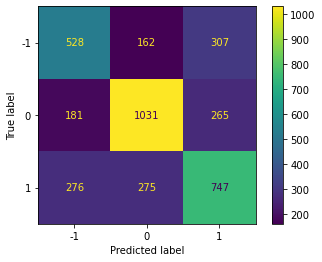

In [235]:
plot_confusion_matrix(dpipe, X_test, y_test)

print(classification_report(dpipe.predict(X_test), y_test))

In [236]:

# dpipe_params = {
#     'model__criterion' : ['gini', 'entropy'],
#     'model__max_depth': [2, 5, 10],
#     'model__min_samples_split': [2, 5, 10, 20],
#     'feature_union__count_transformer__count_vect__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3), (1,3)]
# }

# dpipe_grid = GridSearchCV(dpipe, dpipe_params, cv=5)

In [237]:
# dpipe_grid.fit(X_train, y_train)

# dpipe_grid.best_params_

In [238]:
# plot_confusion_matrix(dpipe_grid.best_estimator_, X_test, y_test)

# print(classification_report(dpipe_grid.best_estimator_.predict(X_test), y_test))

In [239]:
dforest = RandomForestClassifier(n_estimators = 500)

dforest_pipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dforest)
 ])

dforest_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model', RandomF

              precision    recall  f1-score   support

          -1       0.58      0.66      0.62       877
           0       0.82      0.75      0.78      1609
           1       0.67      0.67      0.67      1286

    accuracy                           0.70      3772
   macro avg       0.69      0.69      0.69      3772
weighted avg       0.71      0.70      0.70      3772



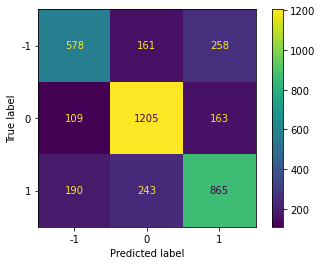

In [240]:
plot_confusion_matrix(dforest_pipe, X_test, y_test)

print(classification_report(dforest_pipe.predict(X_test), y_test))

In [241]:
dbag = BaggingClassifier(n_estimators = 50, bootstrap= True, warm_start= True, random_state = 305)

dbag_pipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dbag)
 ])

dbag_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('count_transformer',
                                                 ColumnTransformer(transformers=[('count_vect',
                                                                                  CountVectorizer(),
                                                                                  'finalized_text')])),
                                                ('scaler_transformer',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  ['upvote_ratio',
                                                                                   'num_comments',
                                                                                   'image?'])]))])),
                ('model',
       

              precision    recall  f1-score   support

          -1       0.53      0.62      0.57       861
           0       0.76      0.73      0.74      1523
           1       0.66      0.62      0.64      1388

    accuracy                           0.66      3772
   macro avg       0.65      0.66      0.65      3772
weighted avg       0.67      0.66      0.67      3772



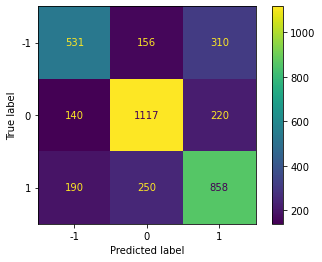

In [242]:
plot_confusion_matrix(dbag_pipe, X_test, y_test)

print(classification_report(dbag_pipe.predict(X_test), y_test))

In [243]:
# bpipe_params = {
#     'model__bootstrap': [True, False],
#     'model__bootstrap_features': [True, False],
#     'model__n_estimators': [100, 120, 140]
# }

# bpipe_grid = RandomizedSearchCV(dbag_pipe, bpipe_params, cv=4, verbose = 10)

In [244]:
# bpipe_grid.fit(X_train, y_train)

# bpipe_grid.best_estimator_

# Modeling on Subreddits

In [245]:
df_by_sub = pd.read_pickle('../data/preprocessed_df.pkl')

In [246]:
df_by_sub['subreddit'] = df_by_sub.index

In [247]:
df_by_sub['alignment'] = df_by_sub['subreddit'].apply(lambda x: labels[x])

In [248]:
df_by_sub

,text,subreddit,alignment
TheRedPill,google fire ph.d biologist/engineer claiming a...,TheRedPill,-1
BlackPeopleTwitter,wildest trend imo corjay lmao_shippuden inco l...,BlackPeopleTwitter,1
WhitePeopleTwitter,solution obvious shooting foot secular talk vv...,WhitePeopleTwitter,1
politics,megathread joe biden projected defeat presiden...,politics,0
law,law school leaked draft dobbs opinion justice ...,law,0
...,...,...,...
Offensivejokes,vegan view vegan think animal die wild mac che...,Offensivejokes,-1
climateskeptics,hypocrisy michael bloomberg plane ae ae _-heth...,climateskeptics,-1
LockdownCriticalLeft,worker uniting solidarity authoritarian govern...,LockdownCriticalLeft,-1
FightingFakeNews,le heckin reddit moment reddit year reddit wee...,FightingFakeNews,-1


In [249]:
X = df_by_sub['text']
y = df_by_sub['alignment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y, random_state = 305)

In [250]:
count_vectorizer = CountVectorizer()

In [251]:
dtree = DecisionTreeClassifier()

dpipe = Pipeline(steps = [
    ('count_vect', count_vectorizer),
    ('model', dtree)
 ])

In [252]:
dpipe.fit(X_train, y_train)

Pipeline(steps=[('count_vect', CountVectorizer()),
                ('model', DecisionTreeClassifier())])

              precision    recall  f1-score   support

          -1       0.33      0.42      0.37        12
           0       0.45      0.50      0.48        20
           1       0.65      0.52      0.58        25

    accuracy                           0.49        57
   macro avg       0.48      0.48      0.47        57
weighted avg       0.51      0.49      0.50        57



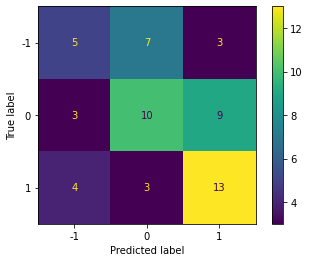

In [253]:
plot_confusion_matrix(dpipe, X_test, y_test)

print(classification_report(dpipe.predict(X_test), y_test))

In [254]:
dforest = RandomForestClassifier(n_estimators = 500)

dforest_pipe = Pipeline(steps = [
    ('count_vectorizer', count_vectorizer),
    ('model', dforest)
 ])

dforest_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('model', RandomForestClassifier(n_estimators=500))])

              precision    recall  f1-score   support

          -1       0.07      0.50      0.12         2
           0       0.77      0.59      0.67        29
           1       0.80      0.62      0.70        26

    accuracy                           0.60        57
   macro avg       0.55      0.57      0.49        57
weighted avg       0.76      0.60      0.66        57



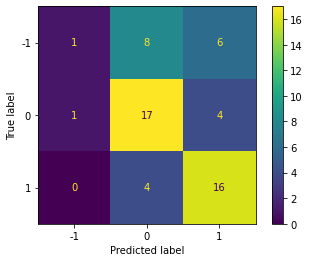

In [255]:
plot_confusion_matrix(dforest_pipe, X_test, y_test)

print(classification_report(dforest_pipe.predict(X_test), y_test))

In [256]:
nb = MultinomialNB()

nb_pipe = Pipeline(steps = [
    ('count_vectorizer', count_vectorizer),
    ('model', nb)
 ])

nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('model', MultinomialNB())])

              precision    recall  f1-score   support

          -1       0.40      0.38      0.39        16
           0       0.59      0.87      0.70        15
           1       0.75      0.58      0.65        26

    accuracy                           0.60        57
   macro avg       0.58      0.61      0.58        57
weighted avg       0.61      0.60      0.59        57



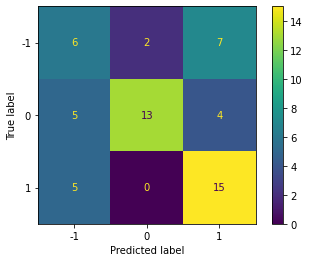

In [257]:
plot_confusion_matrix(nb_pipe, X_test, y_test)

print(classification_report(nb_pipe.predict(X_test), y_test))